In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- Id Column은 의미없는 column이므로 삭제한다.

In [157]:
df.drop(['id'],axis=1, inplace=True)

### data의 dtype 및 null 보유 여부를 확인한다.

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [159]:
df[df['stroke']==1]['bmi'].isnull().sum()

40

In [160]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### 문자열 범주형 변수인 gender, ever_mariied, work_type, Residence_type, smoking_status 의 범주를 확인한다.

In [161]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [162]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [163]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [164]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [165]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [166]:
df.stroke.unique()

array([1, 0], dtype=int64)

### 가설 1 흡연자가 질병이 더 많을 것

Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: smoking_status, dtype: float64


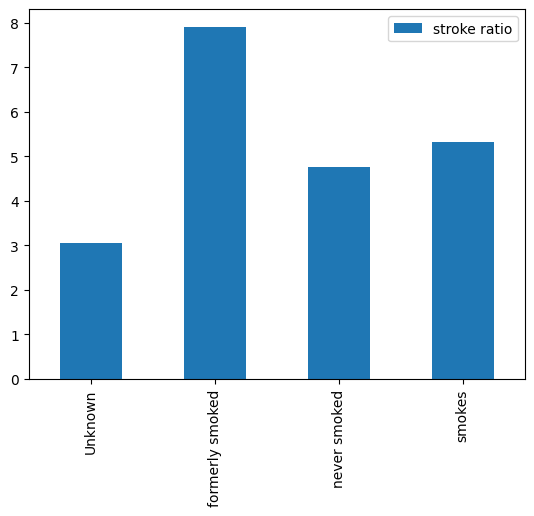

In [167]:
smoke = df[df['stroke']==1]['smoking_status'].value_counts() / df['smoking_status'].value_counts()*100
print(smoke)
fig, ax = plt.subplots(1,1)

smoke.plot(kind='bar')
plt.legend(['stroke ratio'])

- 전체 중 흡연 자의 뇌졸중 비율을 확인함
- 결과 해석 : 비율 확인 시 흡연 경험이 있거나 흡연중인 사람의 뇌졸중 비율이 높았음. 흡연과 뇌졸중은 어느정도 관계가 있는 것으로 확인됨

### 가설 2 단순 성별에 따라서는 차이가 없을 것

Female    4.709419
Male      5.106383
Name: gender, dtype: float64


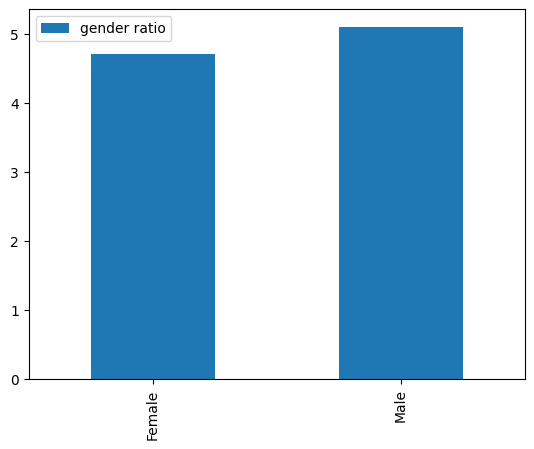

In [168]:
gender = df[df['stroke']==1]['gender'].value_counts() / df['gender'].value_counts()*100

gender.dropna(axis=0, inplace=True)
print(gender)
fig, ax = plt.subplots(1,1)
gender.plot(kind='bar')
plt.legend(['gender ratio'])

- 결과 해석 : 남자가 앞서긴 하지만, 남성의 경우 흡연자 비율이 높을 수도 있으므로, 이러한 인자들을 제외했을 때 단지 성별로 뇌졸중을 가늠하기는 어려워 보이는 수치임

#### 가설 3 뇌졸중이 있는 사람은 고혈압도 동반할 경우가 많을 것

0     3.967910
1    13.253012
Name: hypertension, dtype: float64


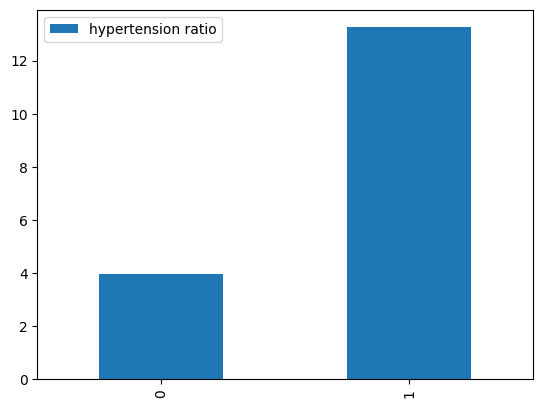

In [174]:
hyper = df[df['stroke']==1]['hypertension'].value_counts() / df['hypertension'].value_counts()*100

hyper.dropna(axis=0, inplace=True)
print(hyper)
fig, ax = plt.subplots(1,1)
hyper.plot(kind='bar')
plt.legend(['hypertension ratio'])

- 전체 중 고혈압 환자의 뇌졸중 비율을 확인함
- 결과 해석 : 비율 확인 시 고혈압 환자의 뇌졸중 비율이 높았음. 고혈압과 뇌졸중은 관계가 있는 것으로 확인됨

### 가설 4 나이가 높을 수록 뇌졸중 환자가 많을 것

<AxesSubplot:xlabel='age', ylabel='Density'>

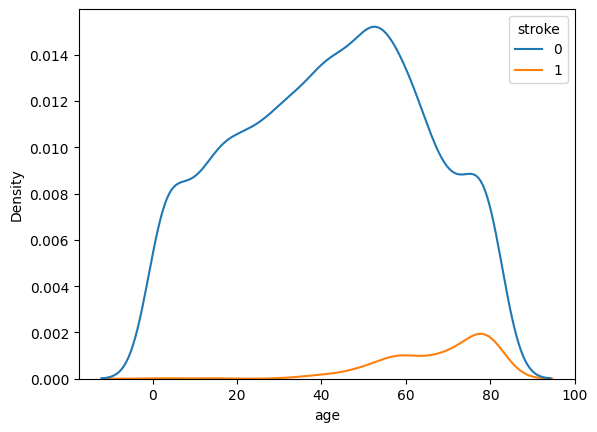

In [170]:
sns.kdeplot(data=df , x='age', hue='stroke')

- 결과 해석 : 뇌졸중 환자의 대부분이 60~80 세의 나이에 집중되어 있는 것으로 확인됨

### 가설 5 나이가 많을 수록 혈당이 높은사람이 많을 것이며, 혈당이 높을 수록 뇌졸중 환자 분포도 많을 것이다

(0.0, 100.0)

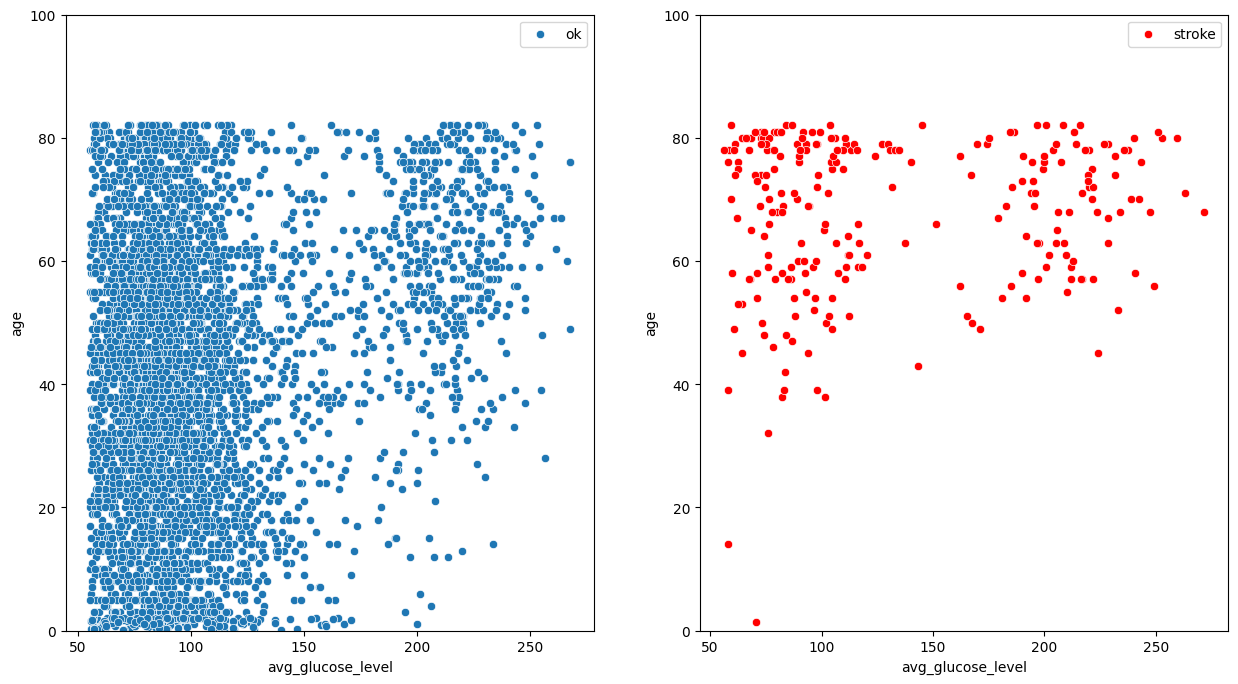

In [171]:
fig, axs = plt.subplots(1,2,figsize=(15, 8))

sns.scatterplot(data=df[df['stroke']==0], x='avg_glucose_level', y='age', ax=axs[0],label='ok')
sns.scatterplot(data=df[df['stroke']==1], x='avg_glucose_level', y='age', ax=axs[1], color='r', label='stroke')
axs[0].set_ylim([0, 100])
axs[1].set_ylim([0, 100])

<AxesSubplot:>

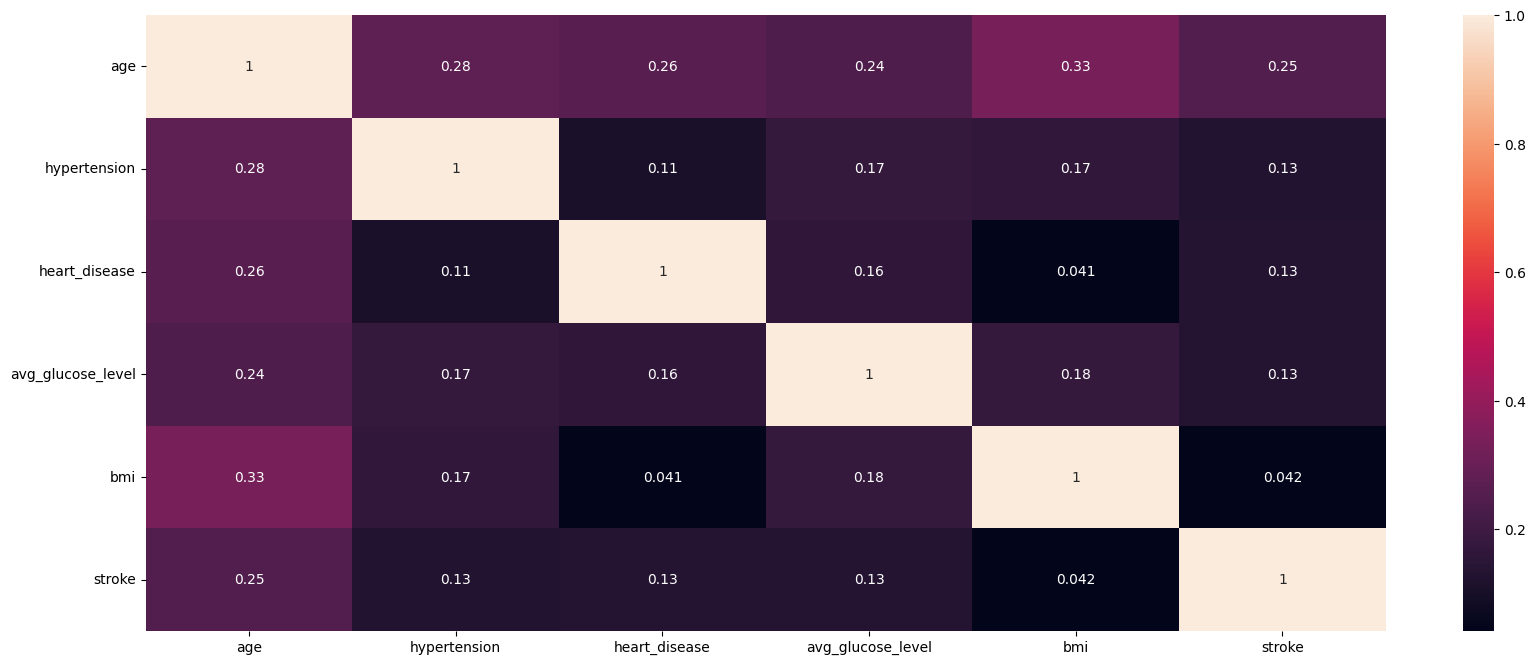

In [104]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

## 추가 전처리 및 모델링

- work_type과 smoking status 는 다른 변수에 비해 범주가 3개 이상인 컬럼이므로 label encoding을 진행하고, gender, ever_married, Residence_type 은 one-hot encoding을 진행하여 
범주형 변수들을 numeric type으로 변환한다.

In [102]:
df['work_type'], label_des = pd.factorize(df['work_type'])
print(label_des)
df['smoking_status'], occp_des = pd.factorize(df['smoking_status'])
print(occp_des)

gender =  pd.get_dummies(df['gender'])
df = pd.concat([df, gender],axis=1)
df.drop(['gender'], axis=1, inplace=True)

ever_married =  pd.get_dummies(df['ever_married'])
df = pd.concat([df, ever_married],axis=1)
df.drop(['ever_married'], axis=1, inplace=True)

Residence_type = pd.get_dummies(df['Residence_type'])
df = pd.concat([df, Residence_type],axis=1)
df.drop(['Residence_type'], axis=1, inplace=True)

df

Index(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], dtype='object')
Index(['formerly smoked', 'never smoked', 'smokes', 'Unknown'], dtype='object')


,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,No,Yes,Rural,Urban
0,67.0,0,1,0,228.69,36.6,0,1,0,1,0,0,1,0,1
1,61.0,0,0,1,202.21,NaN,1,1,1,0,0,0,1,1,0
2,80.0,0,1,0,105.92,32.5,1,1,0,1,0,0,1,1,0
3,49.0,0,0,0,171.23,34.4,2,1,1,0,0,0,1,0,1
4,79.0,1,0,1,174.12,24.0,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,0,83.75,NaN,1,0,1,0,0,0,1,0,1
5106,81.0,0,0,1,125.20,40.0,1,0,1,0,0,0,1,0,1
5107,35.0,0,0,1,82.99,30.6,1,0,1,0,0,0,1,1,0
5108,51.0,0,0,0,166.29,25.6,0,0,0,1,0,0,1,1,0


### 결측치 재확인

In [103]:
df.isna().sum()

age                    0
hypertension           0
heart_disease          0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
Female                 0
Male                   0
Other                  0
No                     0
Yes                    0
Rural                  0
Urban                  0
dtype: int64

#### 201 건의 bmi 수치가 결측되어있음. 현재 주어진 항목으로는 bmi를 계산해서 채워넣을 수 없으니, 우선 결측이 있는 행은 drop 한다.

In [104]:
new_df = df.dropna(subset=['bmi'], axis=0)

new_df.isna().sum()

age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
Female               0
Male                 0
Other                0
No                   0
Yes                  0
Rural                0
Urban                0
dtype: int64

<AxesSubplot:>

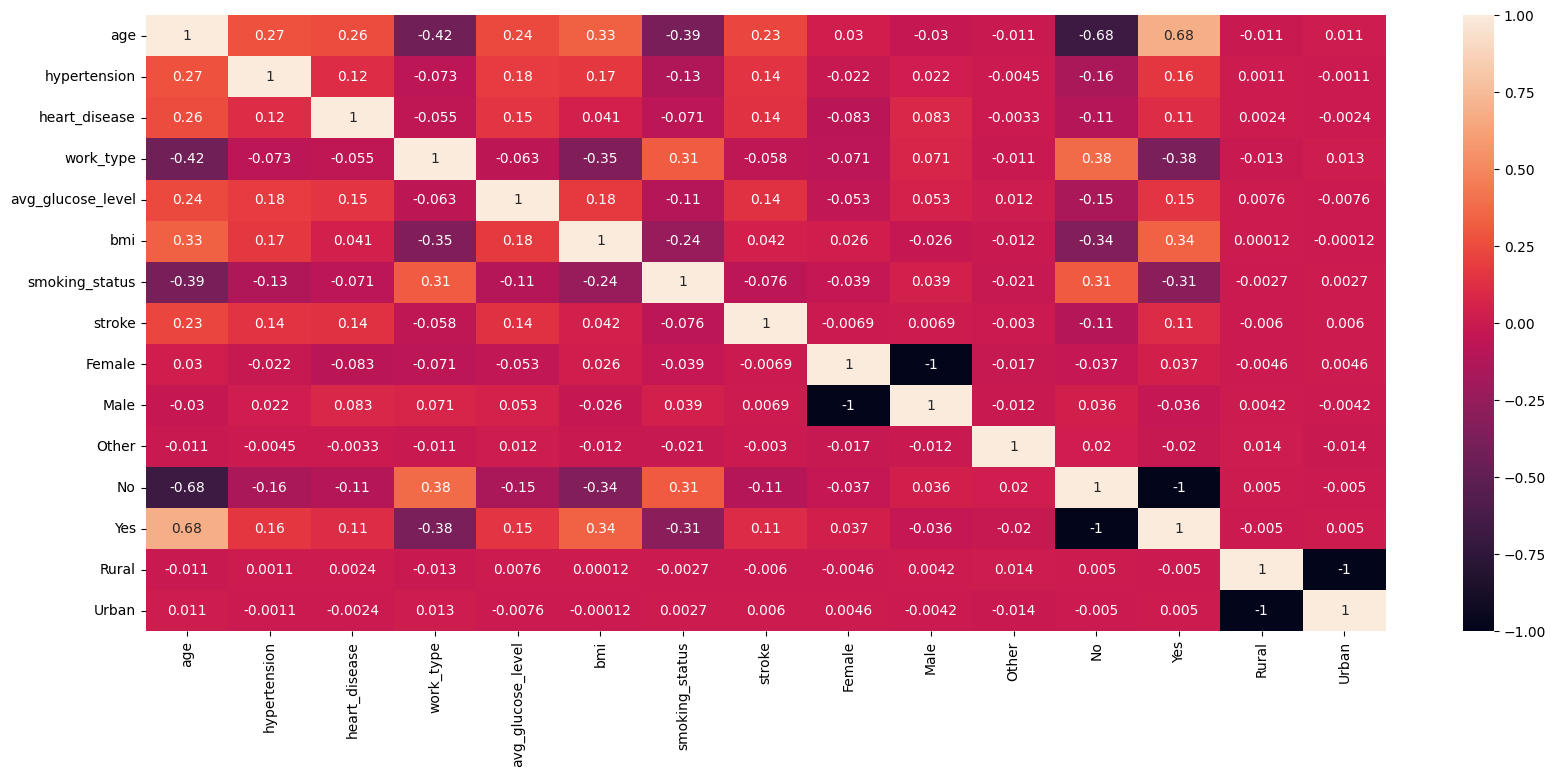

In [105]:
plt.figure(figsize=(20,8))
sns.heatmap(new_df.corr(), annot=True)

In [106]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning

import warnings

In [134]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

def data_split(input_df, y_col = 'label'):
    """ 
    input df : 학습에 사용할 입력 변수, 분류 범주가 모두 포함 된 Data Frame

    y_col : input_df 중 label에 해당하는 Column name
    """

    train_test_dict = dict()
    data_x = input_df.drop([y_col], axis=1) # input data 중 y_col에 해당하는 열 drop 하여 입력 변수에 해당하는 Data만 남김
    feature_label = list(data_x.columns)
    y = input_df[y_col].astype('int') # input data 중 y_col 에 해당하는 Data, y에 할당

    scaler = StandardScaler()

    X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.2,stratify=y, random_state=2020,shuffle=True)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    train_test_dict['test_x'] = X_test
    train_test_dict['test_y'] = y_test
    train_test_dict['train_x'] = X_train
    train_test_dict['train_y'] = y_train

    return train_test_dict, feature_label



def smote_over_sampling(X_train, y_train, result_dict, verbose=True):

    smote = SMOTE(random_state=55)
    x_over, y_over = smote.fit_resample(X_train, y_train)
    if verbose:
        print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
        print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', x_over.shape, y_over.shape)
        print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

    result_dict['train_x'] = x_over
    result_dict['train_y'] = y_over

    return result_dict


def adasyn_over_sampling(X_train, y_train, result_dict, verbose=True):

    adasyn = ADASYN(random_state=55)
    x_over, y_over = adasyn.fit_resample(X_train, y_train)
    if verbose:
        print('ADASYN 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
        print('ADASYN 적용 후 학습용 피처/레이블 데이터 세트: ', x_over.shape, y_over.shape)
        print('ADASYN 적용 후 레이블 값 분포: \n', pd.Series(y_over).value_counts())

    result_dict['train_x'] = x_over
    result_dict['train_y'] = y_over

    return result_dict


def under_sampling(X_train, y_train, result_dict, verbose=True):
    X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)
    if verbose:
        print('Under sampling 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
        print('Under sampling 적용 후 학습용 피처/레이블 데이터 세트: ', X_resampled.shape, y_resampled.shape)
        print('Under sampling 적용 후 레이블 값 분포: \n', pd.Series(y_resampled).value_counts())
    result_dict['train_x'] = X_resampled
    result_dict['train_y'] = y_resampled
    return result_dict



# Case1. Over Sampling

In [135]:
train_test_dict, feature_label = data_split(input_df=new_df, y_col='stroke')
train_test_dict = smote_over_sampling(X_train=train_test_dict['train_x'], y_train=train_test_dict['train_y'],result_dict=train_test_dict)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (3927, 14) (3927,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7520, 14) (7520,)
SMOTE 적용 후 레이블 값 분포: 
 0    3760
1    3760
Name: stroke, dtype: int64


### KNN

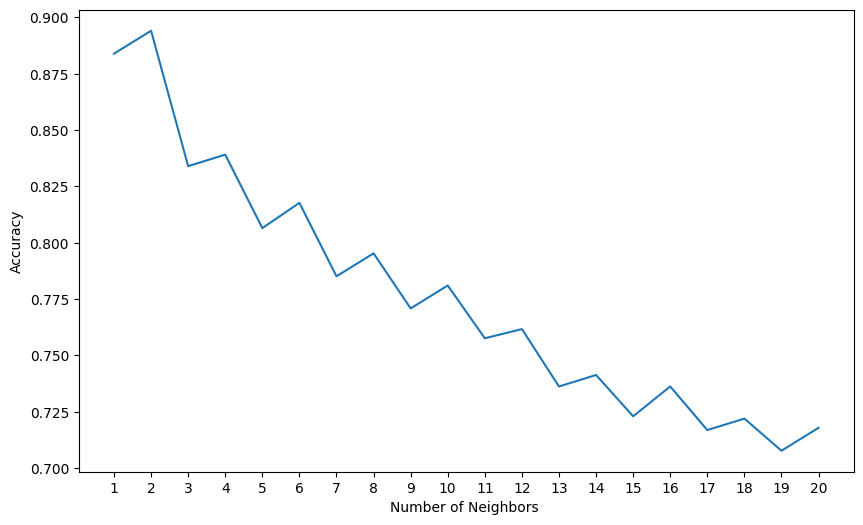

[0.88391039 0.89409369 0.83401222 0.83910387 0.80651731 0.81771894
 0.78513238 0.79531568 0.77087576 0.78105906 0.75763747 0.76171079
 0.73625255 0.7413442  0.72301426 0.73625255 0.71690428 0.72199593
 0.70773931 0.71792261]


In [136]:
knn = KNeighborsClassifier()
mean_acc = np.zeros(20)

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i).fit(train_test_dict['train_x'],train_test_dict['train_y'])
    yhat= knn.predict(train_test_dict['test_x'])
    mean_acc[i-1] = accuracy_score(train_test_dict['test_y'], yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()
print(mean_acc) 

In [139]:
knn_grid_params = {'n_neighbors' : [1,2,3,4],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gscv = GridSearchCV(KNeighborsClassifier(), knn_grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gscv.fit(train_test_dict['train_x'], train_test_dict['train_y'])
print(g_res.best_score_)
print(g_res.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.9498673201601093
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


Training set accuracy:  1.0
Test set accuracy:  0.8940936863543788
Test set f1 :  0.13333333333333333


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       940
           1       0.10      0.19      0.13        42

    accuracy                           0.89       982
   macro avg       0.53      0.56      0.54       982
weighted avg       0.93      0.89      0.91       982



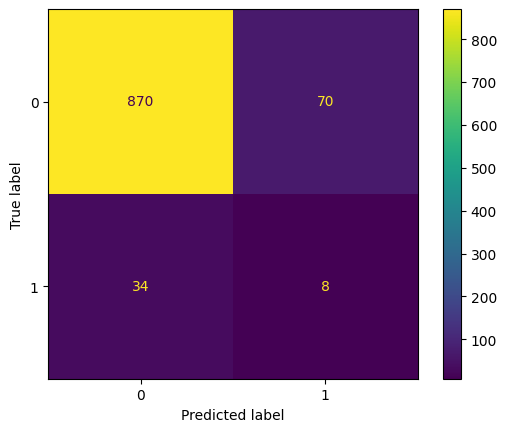

In [140]:
knn = KNeighborsClassifier(n_neighbors = g_res.best_params_['n_neighbors'], 
                           weights = g_res.best_params_['weights'],
                           algorithm = 'brute',
                           metric = g_res.best_params_['metric'])
knn.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = knn.predict(train_test_dict['train_x'])
y_knn = knn.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_knn))
print('Test set f1 : ', f1_score(train_test_dict['test_y'], y_knn))

plot_confusion_matrix(knn, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_knn))
plt.show()


### KNN Classifier

#### Hyper Parameters Tuning

- Neighbor 1~20 까지 설정하여 최적의 Neighbor수 찾는다. -> N = [1, 2, 3, 4]

- KNN Modeling에 영향을 미치는 parameters(위에서 찾은 Neighbor 수 포함)를 dict 형식으로 구성 뒤 GridSearch Cross Validation 기법을 활용하여 최적의 parameter를 확보한다.

→ best params : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

#### Model Training

- 확보된 Parameter를 활용하여, KNN Classifier 학습 진행함.

→ 결과 : Training accuracy: 100% / Test accuracy: 89.40%, Test F1 Score : 13% 

minor한 class (뇌졸중) 에 대하여 예측을 잘하지 못하는 것으로 확인됨.

이는 아무래도 뇌졸중 환자에 대한 feature가 부족하고, data set 또한 부족하여 이러한 현상이 발견되는 것으로 추정됨.


### XGBoost

In [141]:
import xgboost as xgb


xgb_params = {'max_depth': [3, 6, 10, 15],
         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.5, 1.0, 0.1),
         'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
         'n_estimators': [100, 250, 500, 750],
         'num_class': [10]
        }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
rs_cv = RandomizedSearchCV(estimator=xgbclf, param_distributions=xgb_params, scoring='accuracy',n_iter=25,n_jobs=4, verbose=1)

rs_res =rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])

print("Best: %f using %s" % (rs_res.best_score_, rs_res.best_params_))

means = rs_res.cv_results_['mean_test_score']
stds = rs_res.cv_results_['std_test_score']
params = rs_res.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.966755 using {'subsample': 0.8999999999999999, 'num_class': 10, 'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
0.890293 (0.013522) with: {'subsample': 0.7, 'num_class': 10, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
0.946809 (0.020268) with: {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 750, 'max_depth': 15, 'learning_rate': 0.001, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.8999999999999999}
0.956516 (0.023465) with: {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 500, '

In [142]:
rs_res.best_params_

{'subsample': 0.8999999999999999,
 'num_class': 10,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.2,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.8999999999999999}

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set accuracy:  1.0
Test set accuracy:  0.9348268839103869
Test set f1 :  0.13333333333333333
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       940
           1       0.19      0.17      0.18        42

    accuracy                           0.93       982
   macro avg       0.58      0.57      0.57       982
weighted avg       0.93      0.93      0.93       982



d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


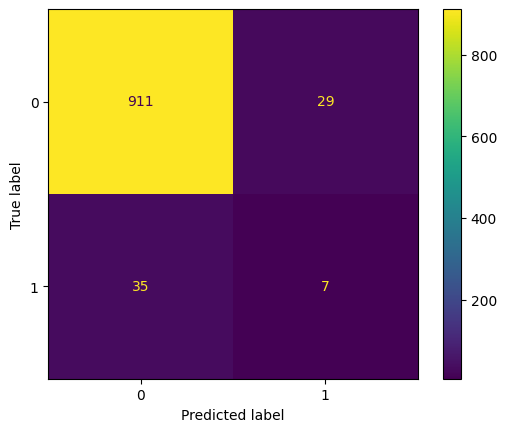

In [144]:

xgb_clf = xgb.XGBClassifier(objective="multi:softmax",
                            subsample=rs_res.best_params_['subsample'], num_class=rs_res.best_params_['num_class'], n_estimators=rs_res.best_params_['n_estimators'],
                            max_depth=rs_res.best_params_['max_depth'], learning_rate=rs_res.best_params_['learning_rate'], 
                            colsample_bylevel=rs_res.best_params_['colsample_bylevel'])

xgb_clf.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = xgb_clf.predict(train_test_dict['train_x'])
y_xgb = xgb_clf.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_xgb))
print('Test set f1 : ', f1_score(train_test_dict['test_y'], y_xgb))
plot_confusion_matrix(xgb_clf, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_xgb))
plt.show()

#### XGBoost

- 사용이유 : Boosting 계열 중 성능이 뛰어난 Xgboost를 사용하여 학습 진행함.

#### Hyper Parameters Tuning

- XGBOOST Model에 영향을 미치는 parameters를 dict 형식으로 구성 함. 이때 영향을 미치는 parameter의 수가 많으므로 GridSearch 접근 시 Parameter 최적화에 오랜 시간이 걸리므로, 
각 반복마다 임의의 값만 대입하여 최적 값을 찾아내는 Random Search 방식의 최적화 기법을 사용했음.

→ best params :{'subsample': 0.5,
 'num_class': 10,
 'n_estimators': 250,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.5}

##### Modeling

- 확보된 Parameter를 활용하여, Xgboost Classifier 학습 진행함.

→ 결과 : training Acc: 93.4% / Test accuracy: 93.4% / Test F1 Score : 18%

In [145]:
svc = SVC()

svc_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
gscv = GridSearchCV(svc, svc_grid, refit = True, verbose = 3)
 

gs_res =gscv.fit(train_test_dict['train_x'], train_test_dict['train_y'])

print(gs_res.best_params_)

print(gs_res.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.881 total time=   2.2s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.852 total time=   2.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.851 total time=   1.9s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.814 total time=   2.3s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.850 total time=   2.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   1.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.903 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=   1.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.902 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

Training set accuracy:  0.9950797872340426
Test set accuracy:  0.9022403258655805
Test set f1 :  0.13333333333333333
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       940
           1       0.10      0.17      0.13        42

    accuracy                           0.90       982
   macro avg       0.53      0.55      0.54       982
weighted avg       0.92      0.90      0.91       982



d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


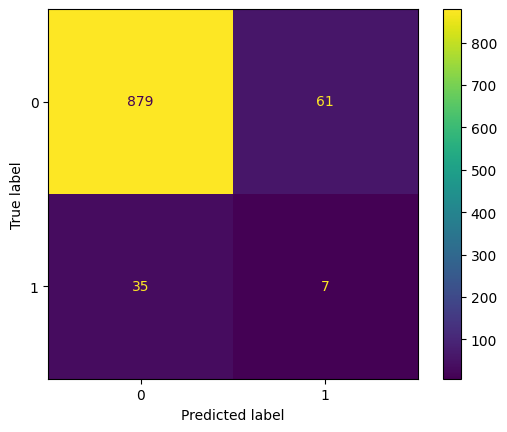

In [146]:
svc = SVC(C=gs_res.best_params_['C'],kernel=gs_res.best_params_['kernel'],gamma=gs_res.best_params_['gamma'])

svc.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = svc.predict(train_test_dict['train_x'])
y_svc = svc.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_svc))
print('Test set f1 : ', f1_score(train_test_dict['test_y'], y_svc, average='macro'))
plot_confusion_matrix(svc, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_svc))
plt.show()


#### Supprort Vector Machine

- 사용이유 : 이진 분류 문제에서 전통적으로 좋은 성능을 확보할 수 있는 모델로 알려져 있음

#### Hyper Parameters Tuning

- Support Vector Machine에 영향을 미치는 parameters를 dict 형식으로 구성 함. 이때 영향을 미치는 parameter의 수를 그다지 많이 설정하지 않았으므로, GridSearch 방식을 활용하여 최적의 파라미터를 확인함.

→ best params :{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

##### Modeling

- 확보된 Parameter를 활용하여, Support Vector Machine Classifier 학습 진행함.

→ 결과 : training Acc: 99.5% / Test accuracy: 90.02% / Test F1 : 13.33%

# Case2. Under Sampling

In [147]:
train_test_dict, feature_label = data_split(input_df=new_df, y_col='stroke')
train_test_dict = under_sampling(X_train=train_test_dict['train_x'], y_train=train_test_dict['train_y'],result_dict=train_test_dict)

Under sampling 적용 전 학습용 피처/레이블 데이터 세트:  (3927, 14) (3927,)
Under sampling 적용 후 학습용 피처/레이블 데이터 세트:  (334, 14) (334,)
Under sampling 적용 후 레이블 값 분포: 
 0    167
1    167
Name: stroke, dtype: int64


- 위 케이스 중 가장 성능이 좋았던 XGBOOST 로 Under Sampling 모델링을 진행함

In [148]:
import xgboost as xgb


xgb_params = {'max_depth': [3, 6, 10, 15],
         'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
         'subsample': np.arange(0.5, 1.0, 0.1),
         'colsample_bytree': np.arange(0.5, 1.0, 0.1),
         'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
         'n_estimators': [100, 250, 500, 750],
         'num_class': [10]
        }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
rs_cv = RandomizedSearchCV(estimator=xgbclf, param_distributions=xgb_params, scoring='accuracy',n_iter=25,n_jobs=4, verbose=1)

rs_res =rs_cv.fit(train_test_dict['train_x'], train_test_dict['train_y'])

print("Best: %f using %s" % (rs_res.best_score_, rs_res.best_params_))

means = rs_res.cv_results_['mean_test_score']
stds = rs_res.cv_results_['std_test_score']
params = rs_res.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.778426 using {'subsample': 0.6, 'num_class': 10, 'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7999999999999999}
0.724695 (0.045121) with: {'subsample': 0.5, 'num_class': 10, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.8999999999999999}
0.727635 (0.059619) with: {'subsample': 0.6, 'num_class': 10, 'n_estimators': 750, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7999999999999999}
0.718589 (0.056014) with: {'subsample': 0.7999999999999999, 'num_class': 10, 'n_estimators': 250, 'max_depth': 3, 

In [149]:
rs_res.best_params_

{'subsample': 0.6,
 'num_class': 10,
 'n_estimators': 750,
 'max_depth': 3,
 'learning_rate': 0.001,
 'colsample_bytree': 0.6,
 'colsample_bylevel': 0.7999999999999999}

d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training set accuracy:  0.7964071856287425
Test set accuracy:  0.6486761710794298
Test set f1 :  0.47482479433389296
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       940
           1       0.10      0.86      0.17        42

    accuracy                           0.65       982
   macro avg       0.54      0.75      0.47       982
weighted avg       0.95      0.65      0.75       982



d:\MHC\2022\개인자료\kmong\lstm_즐거운샤프란\power_venv\p_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


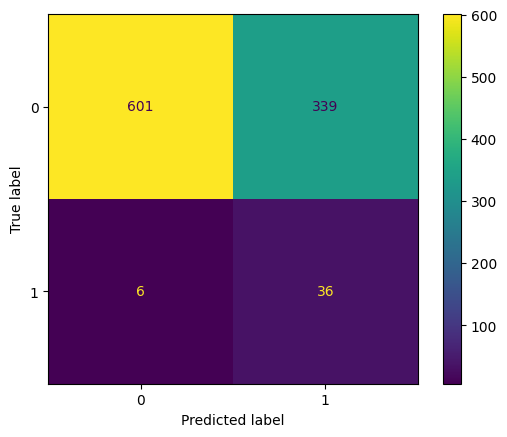

In [155]:

xgb_clf = xgb.XGBClassifier(objective="multi:softmax",
                            subsample=rs_res.best_params_['subsample'], num_class=rs_res.best_params_['num_class'], n_estimators=rs_res.best_params_['n_estimators'],
                            max_depth=rs_res.best_params_['max_depth'], learning_rate=rs_res.best_params_['learning_rate'], 
                            colsample_bylevel=rs_res.best_params_['colsample_bylevel'])

xgb_clf.fit(train_test_dict['train_x'], train_test_dict['train_y'])
y_hat = xgb_clf.predict(train_test_dict['train_x'])
y_xgb = xgb_clf.predict(train_test_dict['test_x'])
print('Training set accuracy: ', accuracy_score(train_test_dict['train_y'], y_hat))
print('Test set accuracy: ',accuracy_score(train_test_dict['test_y'], y_xgb))
print('Test set f1 : ', f1_score(train_test_dict['test_y'], y_xgb, average='macro'))
plot_confusion_matrix(xgb_clf, train_test_dict['test_x'], train_test_dict['test_y'])
print(classification_report(train_test_dict['test_y'], y_xgb))
plt.show()

- 결과 해석: under sampling 진행 시 뇌졸중를 맞게 예측 하는 경우가 매우 늘어나지만, 반대로 정상환자를 뇌졸중 환자로 판정하는 경우가 매우 증가한다.

때문에 위에서 학습된 over sampling 모델과 under sampling 모델을 앙상블하여, 정상과 질병 여부를 모두 적절히 판단하도록 돕는관계로 발전시키면 좋을 것 같다.